Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56742     8]
 [    0 56976]]


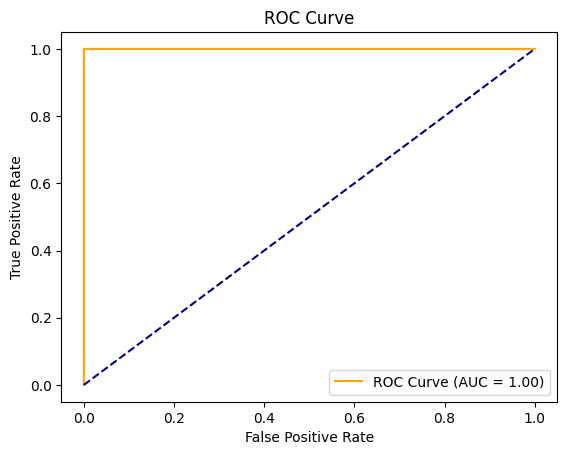

['scaler.pkl']

In [4]:
# fraud_detection_model_build.ipynb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import joblib

# Step 1: Load Dataset
df = pd.read_csv('creditcard.csv')

# Step 2: Features and Label
X = df.drop(columns=['Class'])
y = df['Class']

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: SMOTE for Imbalance Handling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 6: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Prediction
y_pred = model.predict(X_test)

# Step 8: Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 10: Save Model and Scaler
joblib.dump(model, 'fraud_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
